# Iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.data.shape)
n_samples, n_features = iris.data.shape
print(n_samples, n_features)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
150 4


In [3]:
# The shape of the target (labels) array is just an n_samples X 1 array
print(iris.target.shape)

# Here we see that the labels are given numerical values
print(iris.target)

# Use target_names to translate those numerical values to names
print(iris.target_names)
print(iris.target_names[0])

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
setosa


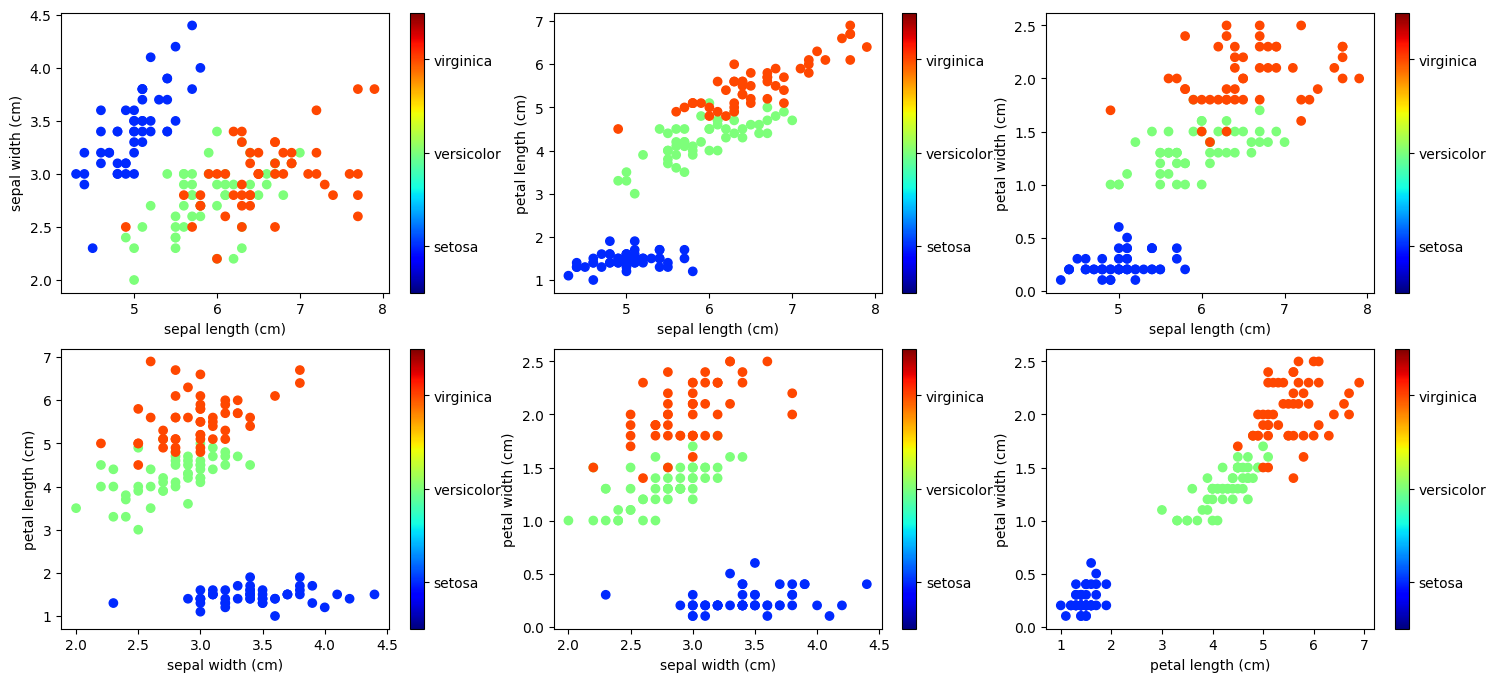

In [31]:
X_index = [0,1,2,3]
Y_index = [0,1,2,3]

fig = plt.figure(figsize=(18,8))
k = 0
for x_index in X_index:
    for y_index in range(x_index+1,len(Y_index)):
        k += 1
        # this formatter will label the colorbar with the correct target names
        formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
        
        ax = fig.add_subplot(2,3,k)
        plt.scatter(iris.data[:, x_index], iris.data[:, y_index], 
                    c=iris.target, cmap=plt.colormaps['jet'])

        plt.colorbar(ticks=[0, 1, 2], format=formatter)
        plt.clim(-0.5, 2.5)
        plt.xlabel(iris.feature_names[x_index])
        plt.ylabel(iris.feature_names[y_index]);
plt.show()

# Handwritten digits

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [32]:
digits.data.shape

(1797, 64)

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

![](digits.png) 

### Part 0: visual classification

In [75]:
my_guesses = [
    [8,9,8,1,2,6,9],
    [4,9,4,0,6,1,7],
    [6,9,5,4,4,2,4],
    [0,5,6,4,7,9,3],
    [2,1,0,8,3,9,6],
    [2,4,2,0,5,4,9],
    [9,6,2,6,1,0,0]
]

### Part 1: dimensionality reduction

In [33]:
from sklearn.manifold import Isomap

#### 2D

In [34]:
isomap = Isomap(n_components=2)      
data_transf = isomap.fit_transform(digits.data)

/home/sandokan/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sandokan/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


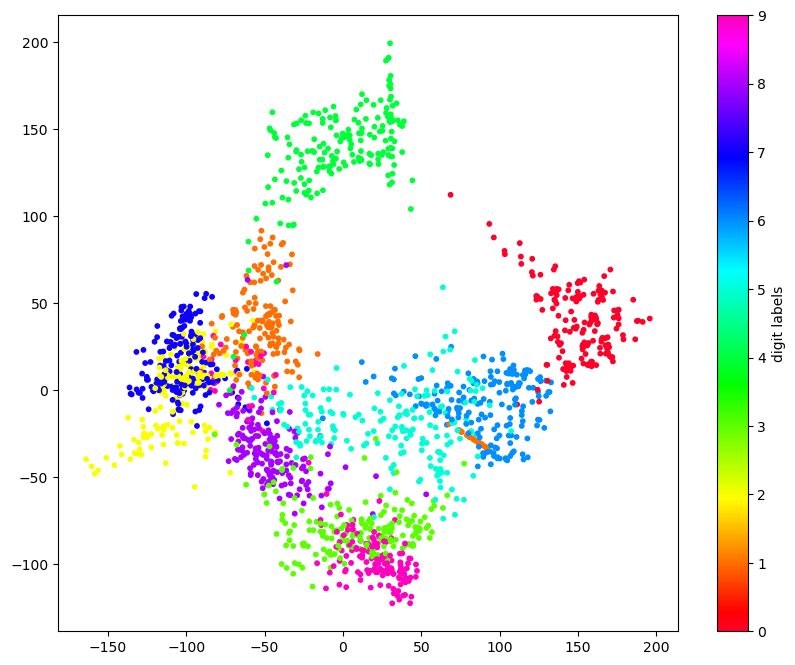

In [44]:
plt.figure(figsize=(10, 8))
color = True
if color:
    scatter = plt.scatter(data_transf[:, 0], data_transf[:, 1], c=digits.target, cmap='gist_rainbow', s=10)
    plt.colorbar(scatter, ticks=np.arange(10), label='digit labels')
else:
    scatter = plt.scatter(data_transf[:, 0], data_transf[:, 1], c='b', s=5)

plt.show()

In [8]:
print(digits.data.shape)
print(data_transf.shape)

(1797, 64)
(1797, 2)


#### 3D

In [45]:
isomap = Isomap(n_components=3)      
data_transf = isomap.fit_transform(digits.data)

/home/sandokan/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sandokan/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


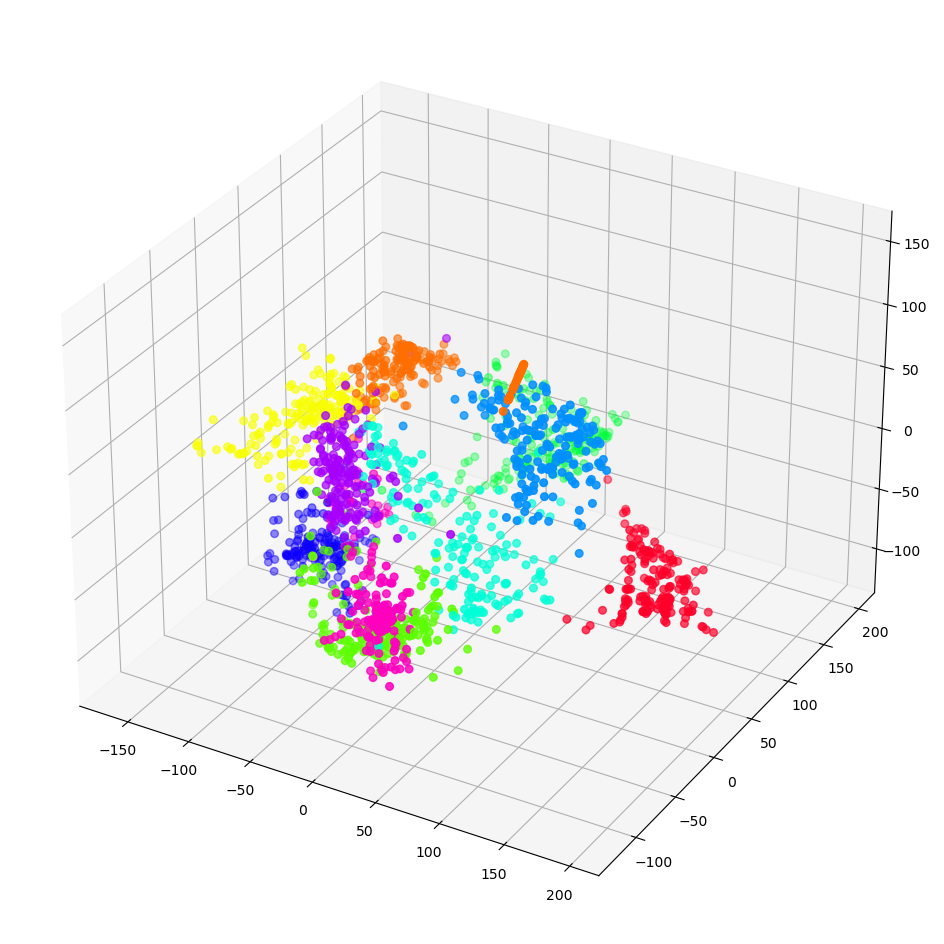

In [47]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_transf[:,0],data_transf[:,1],data_transf[:,2],c=digits.target,cmap='gist_rainbow',s=30)
plt.show()

#### 1D

In [48]:
isomap = Isomap(n_components=1)      
data_transf = isomap.fit_transform(digits.data)

/home/sandokan/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sandokan/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


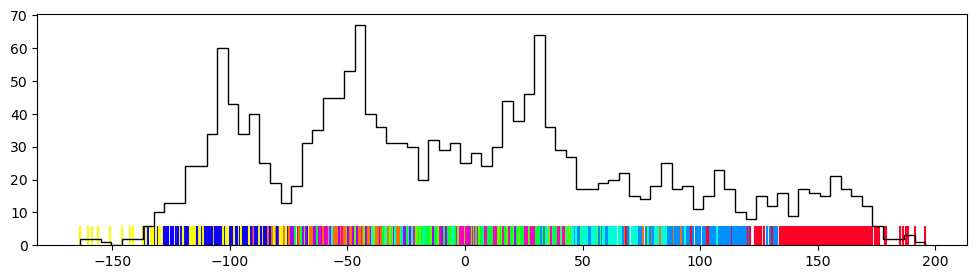

In [49]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
ax.scatter(data_transf,np.zeros(len(data_transf)),c=digits.target,marker='|',cmap='gist_rainbow',s=800)
ax.hist(data_transf, 80, histtype='step', color='k')
plt.show()

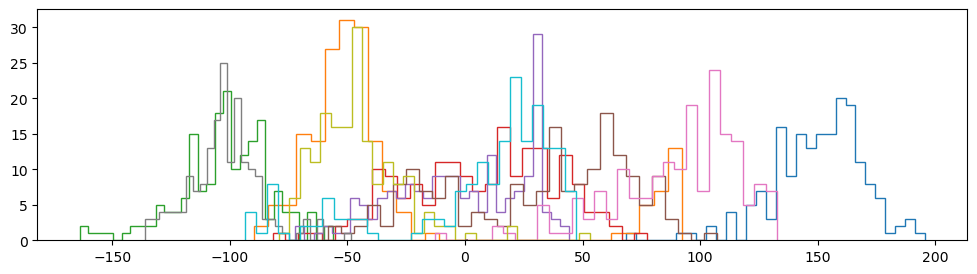

In [56]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
for i in range(len(digits.target)):
    ax.hist(data_transf[digits.target==i], 30, histtype='step')
plt.show()

### Part 2: classification

In [57]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [58]:
# training testing division of the dataset (80% training, 20% test)
data_train, data_test, target_train, target_test = train_test_split(digits.data, digits.target, random_state=19, train_size=0.8, test_size=None)

In [59]:
print(data_train.shape, target_train.shape)
print(data_test.shape, target_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


In [60]:
LRclass = LogisticRegression(max_iter=10000, solver='sag')
LRclass.fit(data_train, target_train)

LogisticRegression(max_iter=10000, solver='sag')

In [62]:
prediction_train = LRclass.predict(data_train)
prediction_test = LRclass.predict(data_test)

# compute the accuracy
a_train = accuracy_score(target_train, prediction_train)
a_test = accuracy_score(target_test, prediction_test)

print('Accuracy: \nTRAIN', a_train, '\nTEST ', round(a_test,3))

Accuracy: 
TRAIN 1.0 
TEST  0.964


For the training dataset the accuracy is 100% because it contains the data from which LogisticRegression is learning the classification criteria. This is not true for the test, in which there are errors in the prediction, as we can see from the confusion matrix below.

Effective: 8 
Predicted: 1


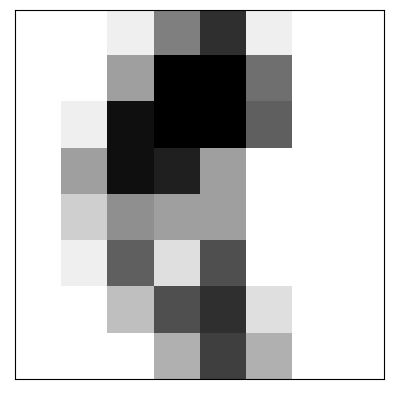

In [63]:
# example of wrong prediction
n = 27
plt.imshow(data_test[n].reshape((8,8)), cmap='binary')
plt.xticks([])
plt.yticks([])

print('Effective:', target_test[n], '\nPredicted:', prediction_test[n])

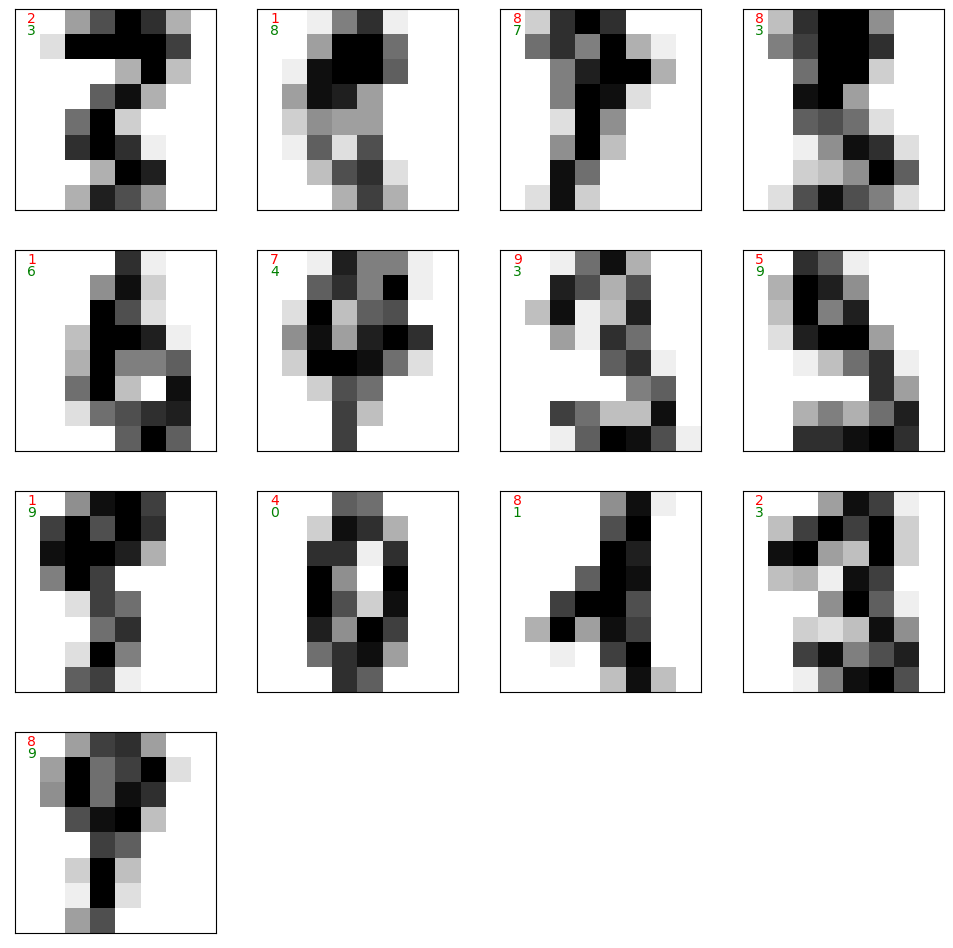

In [64]:
# all wrong predictions
fig = plt.figure(figsize=(12,12))
i=0
for n in range(len(target_test)):
    if target_test[n] != prediction_test[n]:
        i+=1
        ax = fig.add_subplot(4,4,i)
        plt.imshow(data_test[n].reshape((8,8)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.text(0.,0.,prediction_test[n],c='r')
        plt.text(0.,0.5,target_test[n],c='g')
plt.show()

/tmp/ipykernel_2280/2866736447.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(CM), cmap='Blues', interpolation='nearest')


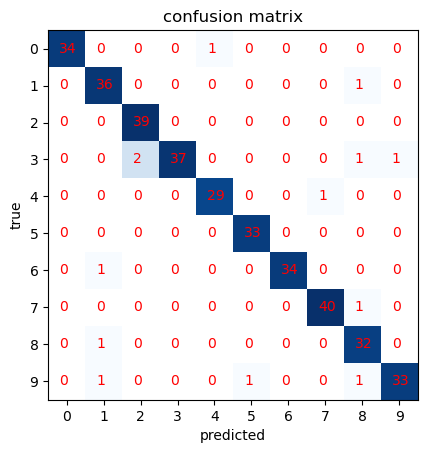

In [65]:
CM = confusion_matrix(target_test, prediction_test)
plt.imshow(np.log(CM), cmap='Blues', interpolation='nearest')
for i in range(10):
    for j in range(10):
        plt.text(i-0.2,j+0.1,CM[j,i],c='r')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title('confusion matrix')
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10))
plt.show()

In [66]:
print("Most difficult digit to identify:", np.argmin(np.diag(CM)))

Most difficult digit to identify: 4


### Back to visual classification

In [76]:
my_guesses = np.array(my_guesses).reshape(49)
my_guesses

array([8, 9, 8, 1, 2, 6, 9, 4, 9, 4, 0, 6, 1, 7, 6, 9, 5, 4, 4, 2, 4, 0,
       5, 6, 4, 7, 9, 3, 2, 1, 0, 8, 3, 9, 6, 2, 4, 2, 0, 5, 4, 9, 9, 6,
       2, 6, 1, 0, 0])

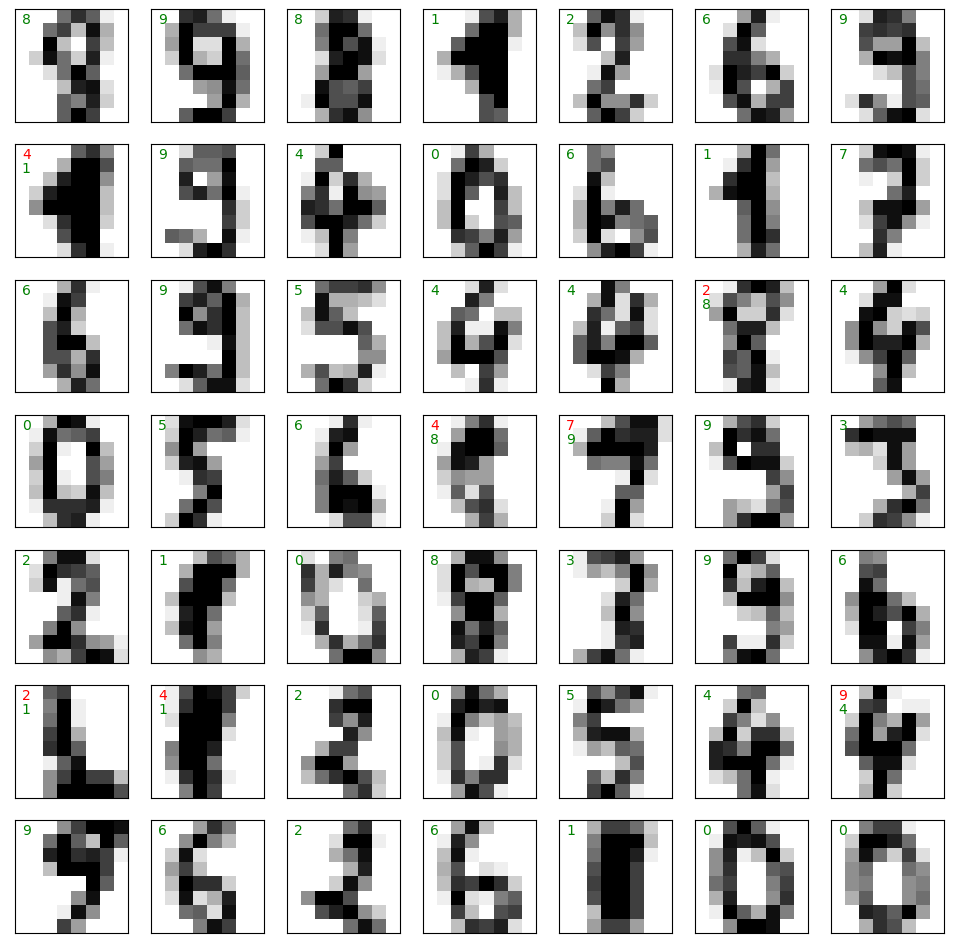

My efficiency = 85.7 %


In [88]:
# all wrong predictions
fig = plt.figure(figsize=(12,12))
right = 0

np.random.seed(4321) 
i_choice = np.random.choice(digits.images.shape[0],49)

for i,n in enumerate(i_choice):

    ax = fig.add_subplot(7,7,i+1)
    plt.imshow(digits.data[n].reshape((8,8)), cmap='binary')
    
    plt.xticks([])
    plt.yticks([])
    if my_guesses[i]==digits.target[n]:  
        plt.text(0.,0.5, my_guesses[i], c='g')
        right += 1
    else:
        plt.text(0.,0.5, my_guesses[i], c='r')
        plt.text(0.,1.5, digits.target[n], c='g')
    
plt.show()

print("My efficiency =", round(right/49*100, 1),'%')